In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('./final/깐굴.csv')

In [9]:
data = data.drop(['Unnamed: 0'],axis=1,inplace=False)

In [11]:
data.to_csv('./final/깐굴.csv')

In [12]:
data

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
0,(선)깐굴,삼천포,11000,7.4,2006,4,4,2006.04,2972.97
1,(선)깐굴,고흥,17000,120.0,2006,4,4,2006.04,4250.00
2,(선)깐굴,삼천포,17000,87.0,2006,4,4,2006.04,5862.07
3,(선)깐굴,북한,9000,60.0,2006,4,4,2006.04,4500.00
4,(선)깐굴,삼천포,10000,256.0,2006,4,4,2006.04,5000.00
...,...,...,...,...,...,...,...,...,...
78004,(선)깐굴,여수,8900,39.9,2021,4,8,2021.04,4684.21
78005,(선)깐굴,통영,16100,85.5,2021,4,8,2021.04,8473.68
78006,(선)깐굴,통영,16400,17.0,2021,4,8,2021.04,9647.06
78007,(선)깐굴,통영,11000,7.8,2021,4,8,2021.04,8461.54


In [13]:
sea = pd.read_csv('./final/해상기상_위치.csv')

<AxesSubplot:>

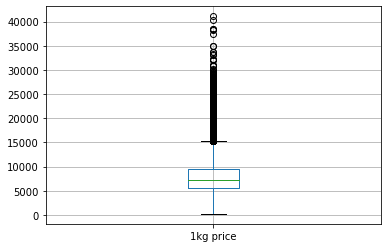

In [15]:
data[['1kg price']].boxplot()

In [16]:
data[data['1kg price']>15000]

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
1252,(선)깐굴,통영,40000,8.5,2006,9,12,2006.09,23529.41
2393,(선)깐굴,삼천포,25400,144.0,2006,11,11,2006.11,15875.00
2396,(선)깐굴,남해,27000,265.2,2006,11,11,2006.11,15882.35
2450,(선)깐굴,남해,26900,285.6,2006,11,13,2006.11,15823.53
2490,(선)깐굴,남해,27000,309.4,2006,11,14,2006.11,15882.35
...,...,...,...,...,...,...,...,...,...
77568,(선)깐굴,삼천포,33100,205.2,2021,2,10,2021.02,17421.05
77569,(선)깐굴,삼천포,37900,220.0,2021,2,10,2021.02,18950.00
77575,(선)깐굴,사천,34800,83.6,2021,2,10,2021.02,18315.79
77597,(선)깐굴,사천,40400,40.0,2021,2,15,2021.02,20200.00


In [20]:
pd.qcut(data['1kg price'], 4, ['q1','q2','q3','q4'])

0        q1
1        q1
2        q2
3        q1
4        q1
         ..
78004    q1
78005    q3
78006    q4
78007    q3
78008    q3
Name: 1kg price, Length: 78009, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [28]:
Q1 = (data['1kg price']).quantile(.25)
Q2 = (data['1kg price']).quantile(.5)
Q3 = (data['1kg price']).quantile(.75)

In [29]:
Q1,Q2,Q3

(5625.0, 7333.33, 9518.52)

In [31]:
IQR = Q3-Q1
IQR

3893.5200000000004

In [33]:
min = Q1-1.5*IQR
max = (Q3+1.5*IQR).round(2)
min, max

(-215.28000000000065, 15358.8)

In [39]:
data = data[data['1kg price']<=max]

In [40]:
data

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
0,(선)깐굴,삼천포,11000,7.4,2006,4,4,2006.04,2972.97
1,(선)깐굴,고흥,17000,120.0,2006,4,4,2006.04,4250.00
2,(선)깐굴,삼천포,17000,87.0,2006,4,4,2006.04,5862.07
3,(선)깐굴,북한,9000,60.0,2006,4,4,2006.04,4500.00
4,(선)깐굴,삼천포,10000,256.0,2006,4,4,2006.04,5000.00
...,...,...,...,...,...,...,...,...,...
78004,(선)깐굴,여수,8900,39.9,2021,4,8,2021.04,4684.21
78005,(선)깐굴,통영,16100,85.5,2021,4,8,2021.04,8473.68
78006,(선)깐굴,통영,16400,17.0,2021,4,8,2021.04,9647.06
78007,(선)깐굴,통영,11000,7.8,2021,4,8,2021.04,8461.54


In [42]:
# 결측값 없음
data.isnull().sum()

어종           0
산지           0
평균가          0
최종수량         0
year         0
month        0
day          0
date         0
1kg price    0
dtype: int64

In [43]:
data.to_csv('./final/깐굴_outlier_delete.csv')